## Abstract Sapientino with Restraining Bolts.

Level of abstraction "zero", with restraining bolts.

The goal is to visit N colors in a certain order.

In [1]:
%matplotlib inline

from multinav.helpers.gym import rollout
from multinav.algorithms.value_iteration import value_iteration
from multinav.wrappers.temprl import MyTemporalGoalWrapper

import random
from multinav.envs.abstract_sapientino import AbstractSapientino, AbstractSapientinoTemporalGoal
from multinav.helpers.notebooks import print_env, print_automaton
from multinav.restraining_bolts.rb_abstract_sapientino import AbstractSapientinoRB

pygame 2.0.0 (SDL 2.0.12, python 3.7.6)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
formula = AbstractSapientinoRB(nb_colors=3).make_goal()
formula

'<(!red & !green & !blue)*;red;(!red & !green & !blue)*;green;(!red & !green & !blue)*;blue>tt'

In [3]:
nb_colors = 3
tg = AbstractSapientinoRB(nb_colors).make_sapientino_goal()
env = AbstractSapientino(nb_colors, failure_probability=0.0)
print("Before temporal goal wrapper:")
print(f"Observation space: {env.observation_space}")
print(f"Action space: {env.action_space}")
env = MyTemporalGoalWrapper(env, [tg])
print("After temporal goal wrapper:")
print(f"Observation space: {env.observation_space}")
print(f"Action space: {env.action_space}")

Before temporal goal wrapper:
Observation space: Discrete(4)
Action space: Discrete(5)
After temporal goal wrapper:
Observation space: Tuple(Discrete(4), MultiDiscrete([6]))
Action space: Discrete(5)


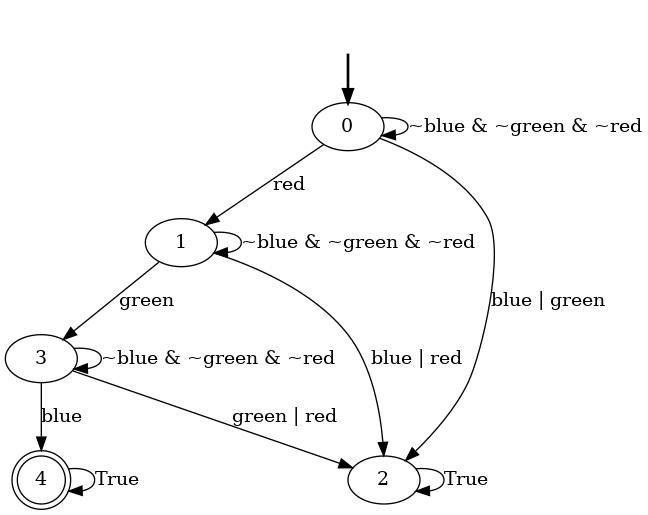

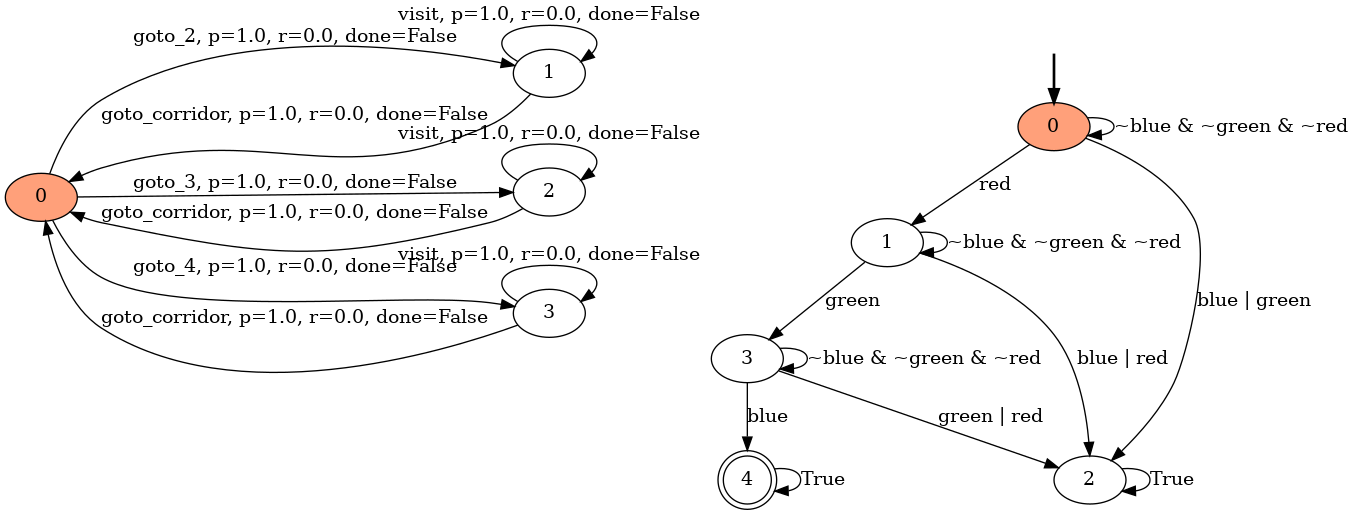

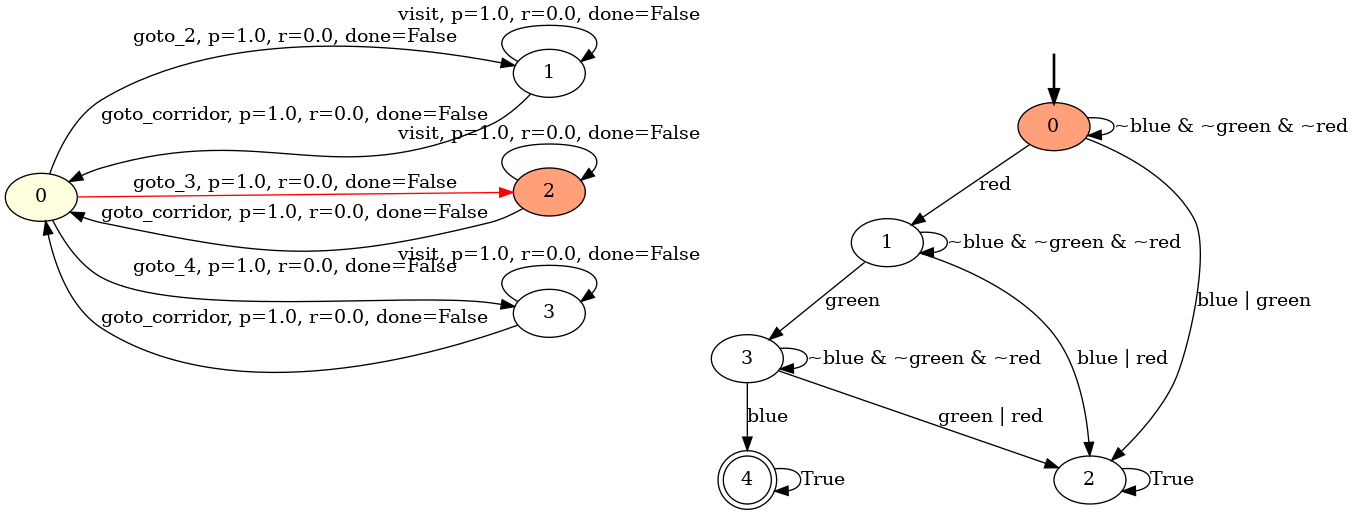

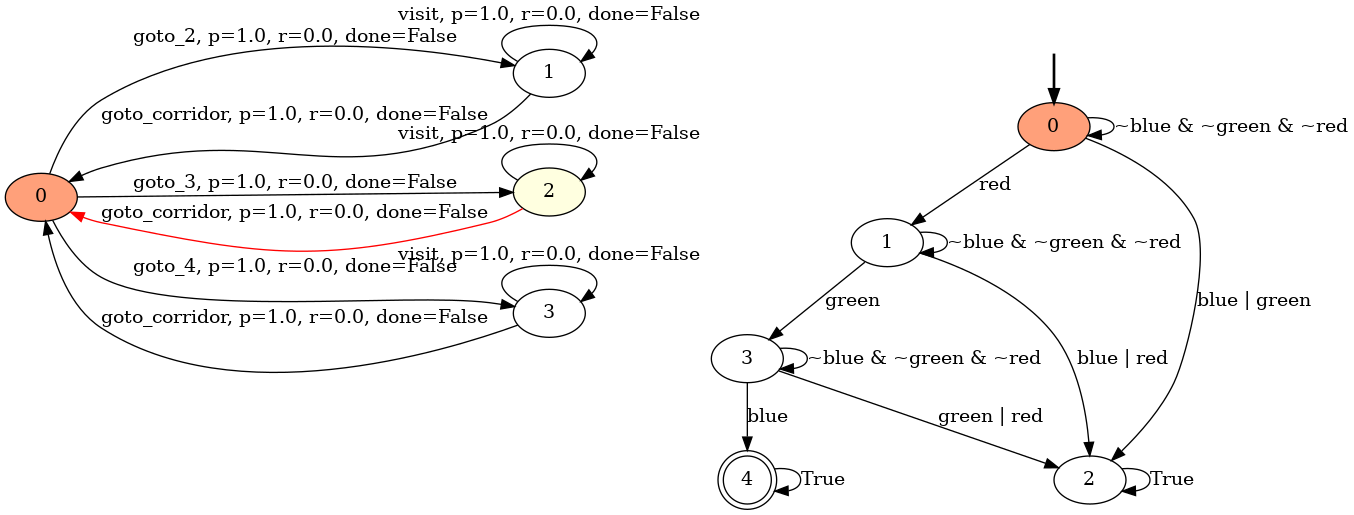

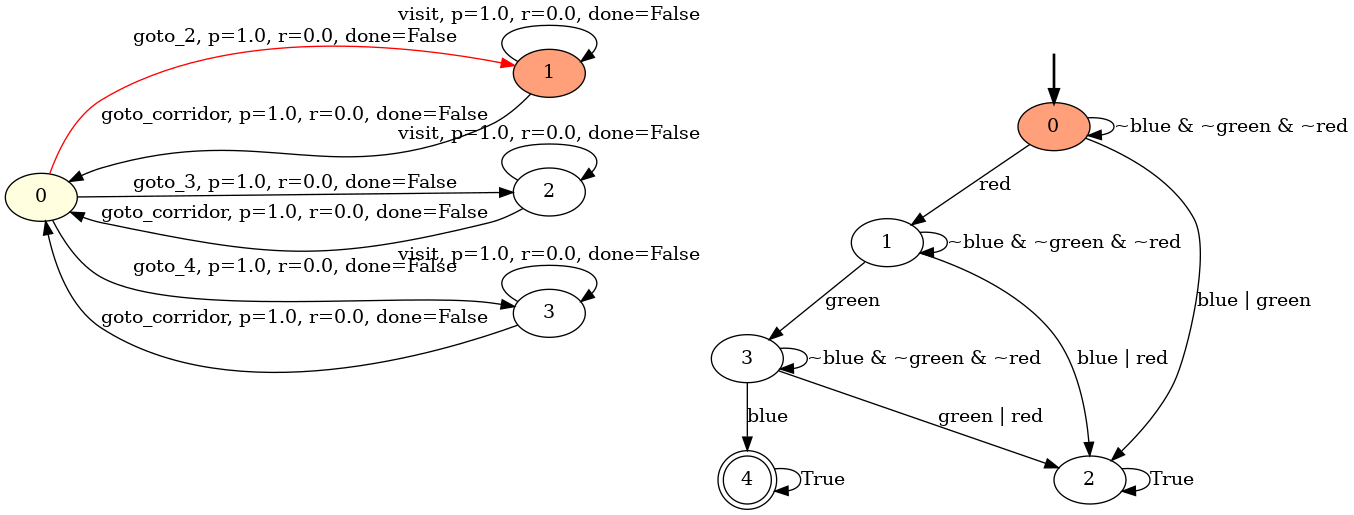

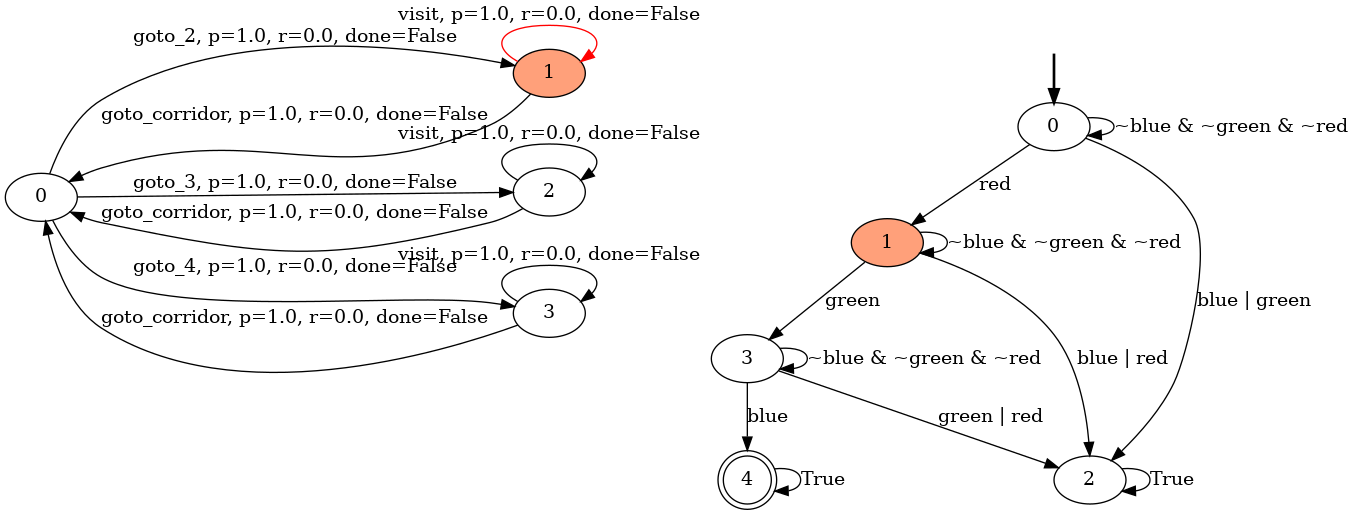

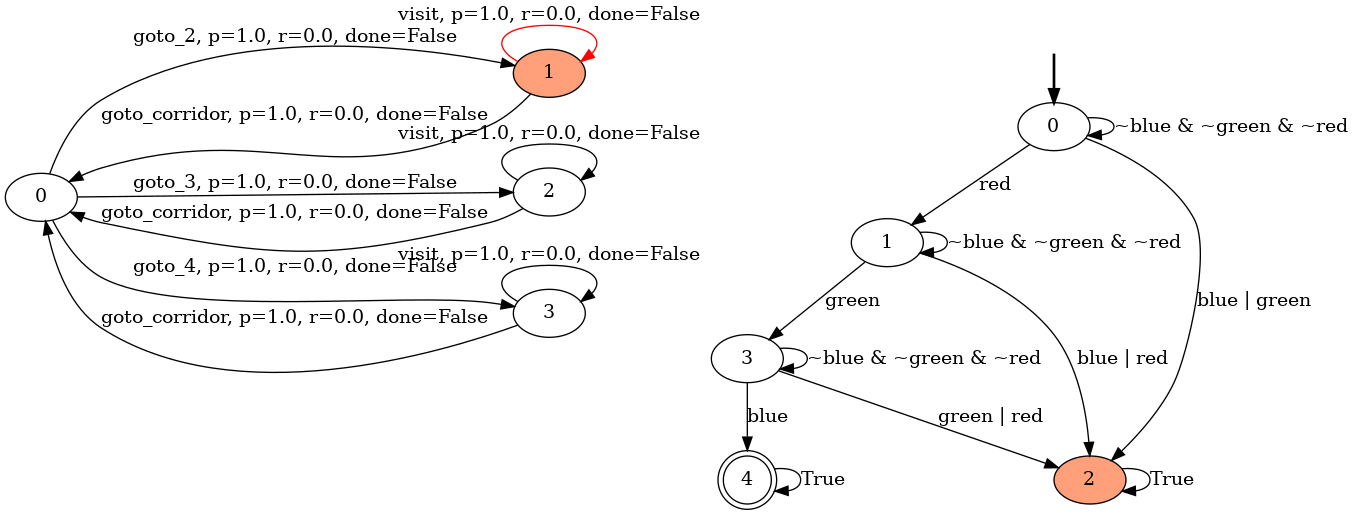

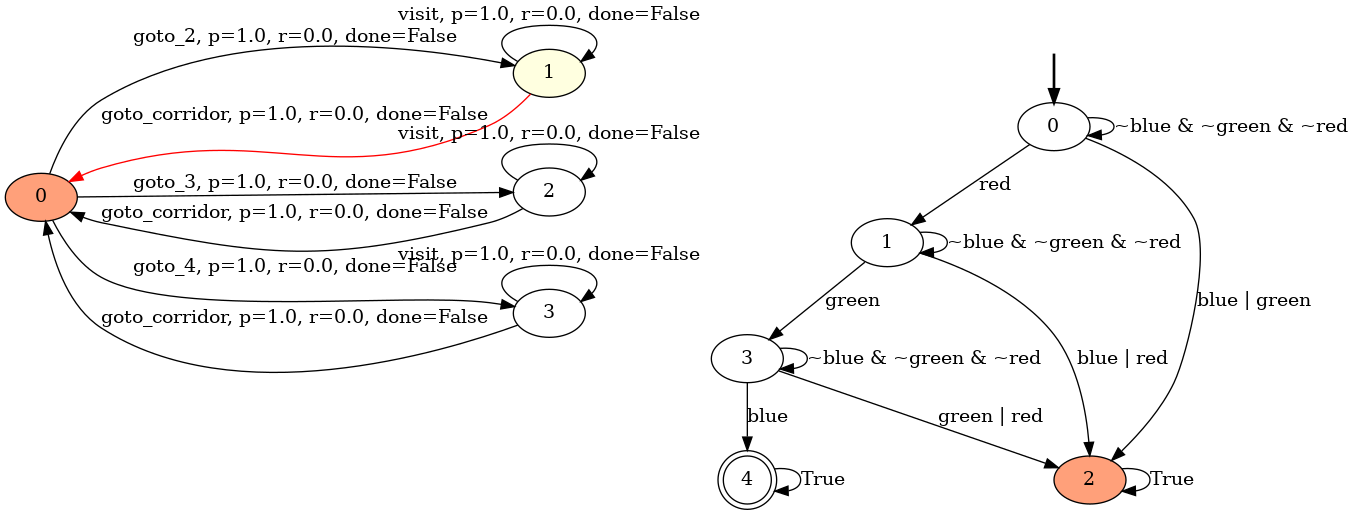

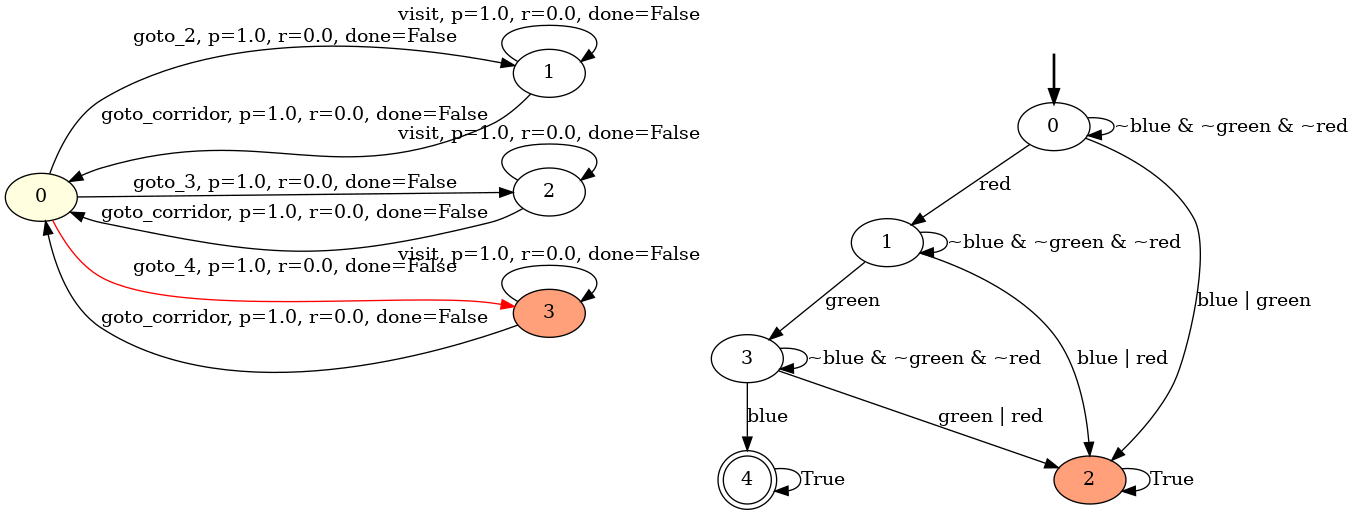

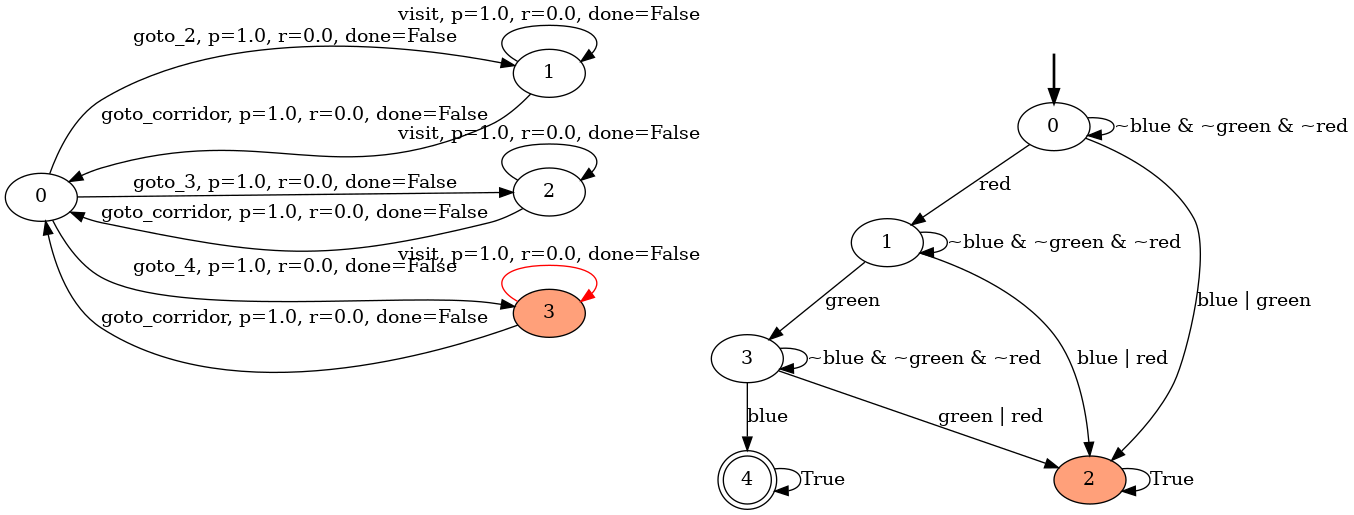

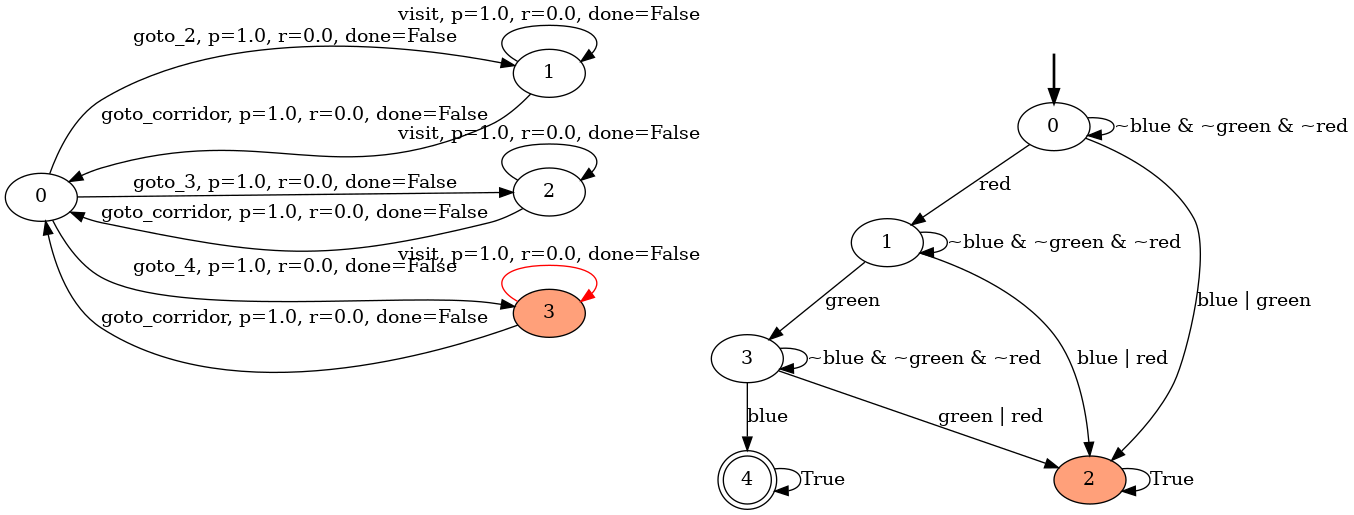

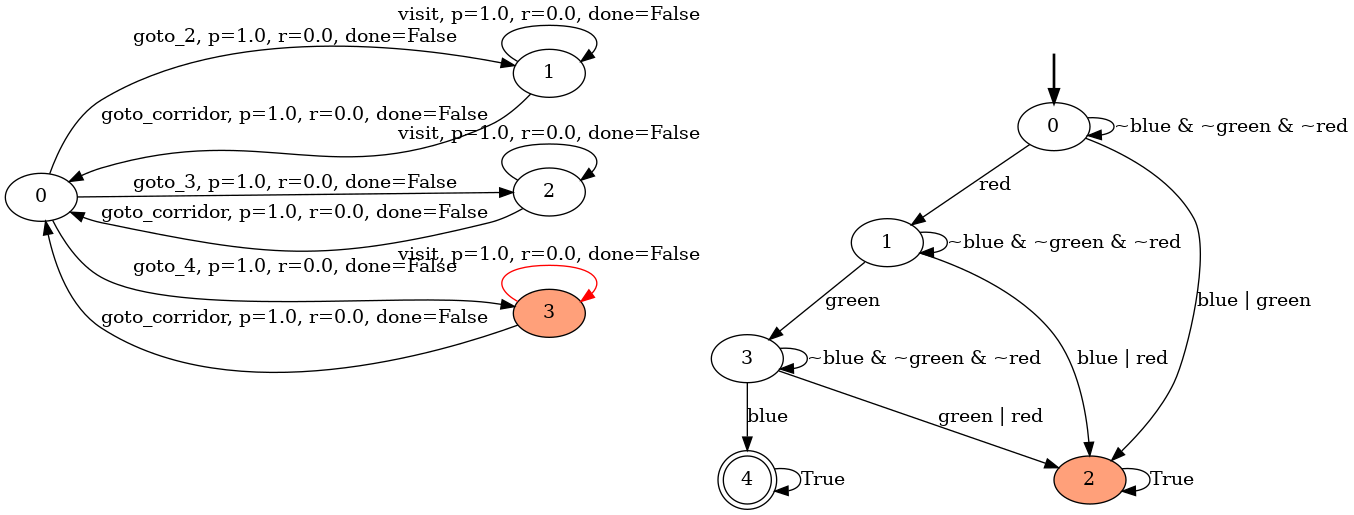

In [4]:
print_automaton(tg.automaton)

state = env.reset()
print_env(env)
for _ in range(10):
    action = random.choice(list(env.available_actions(state[0])))
    state, reward, done, info = env.step(action)
    print_env(env)

For value iteration, we need the enviornment with the full explicit model.

In [5]:
nb_colors = 3
rb = AbstractSapientinoRB(nb_colors)
env = AbstractSapientinoTemporalGoal(rb, [nb_colors], dict(failure_probability=0.1))

value, policy = value_iteration(env, discount=0.9, max_iterations=200)
print(f"Learned value function:")
for s,v in value.items():
    print(f"s={s}, v={v}")

Learned value function:
s=(0, 0), v=9.331803742693165
s=(0, 1), v=11.909085686486607
s=(0, 2), v=7.376310971385248e-11
s=(0, 3), v=15.198160822749804
s=(0, 4), v=18.173389432228223
s=(0, 5), v=0.0
s=(1, 0), v=10.48388850248662
s=(1, 1), v=11.778206501698127
s=(1, 2), v=7.775314466422161e-11
s=(1, 3), v=15.031137408198637
s=(1, 4), v=19.18246183005154
s=(1, 5), v=0.0
s=(2, 0), v=9.229246856385924
s=(2, 1), v=13.379353955327742
s=(2, 2), v=7.775314466422161e-11
s=(2, 3), v=15.031137408198637
s=(2, 4), v=19.18246183005154
s=(2, 5), v=0.0
s=(3, 0), v=9.229246856385924
s=(3, 1), v=11.778206501698127
s=(3, 2), v=7.775314466422161e-11
s=(3, 3), v=17.07448833332712
s=(3, 4), v=19.18246183005154
s=(3, 5), v=0.0


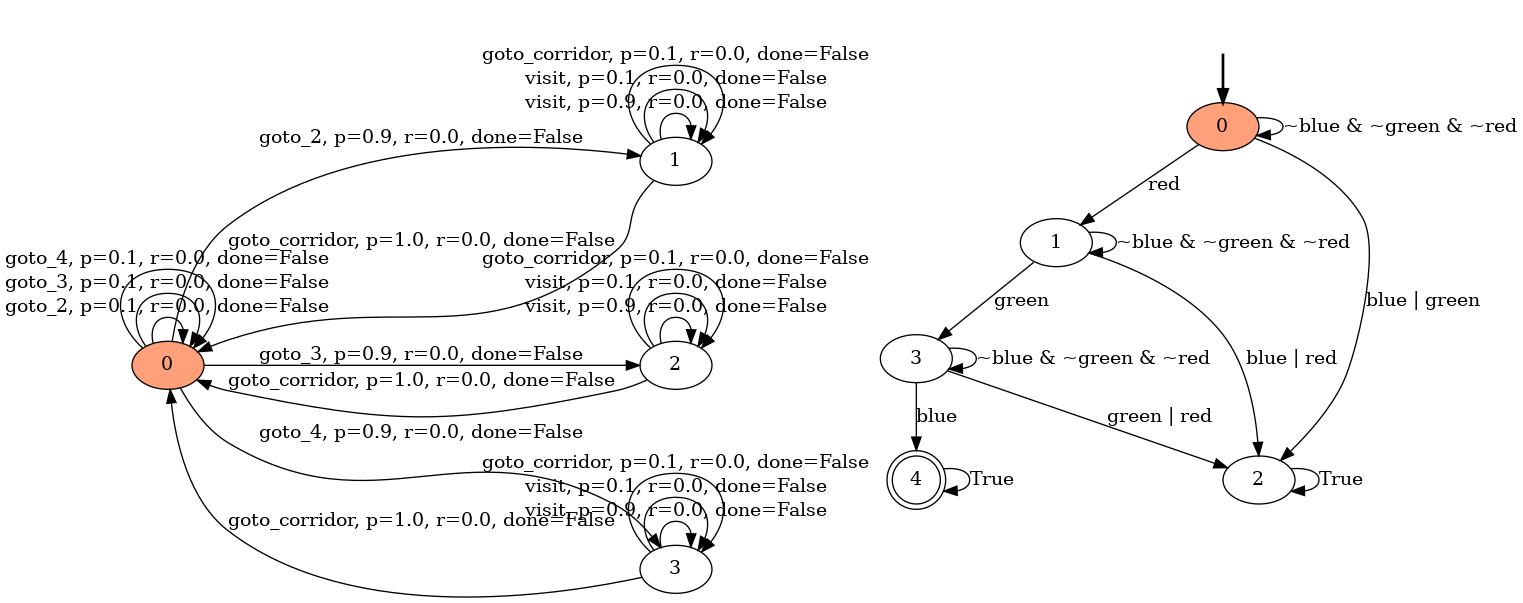

s=(0, 0), r=00.0, value=09.33
s=(1, 0), r=00.0, value=10.48
s=(1, 1), r=00.0, value=11.78
s=(0, 1), r=00.0, value=11.91
s=(0, 1), r=00.0, value=11.91
s=(2, 1), r=00.0, value=13.38
s=(2, 3), r=00.0, value=15.03
s=(0, 3), r=00.0, value=15.20
s=(3, 3), r=00.0, value=17.07
s=(3, 4), r=20.0, value=19.18


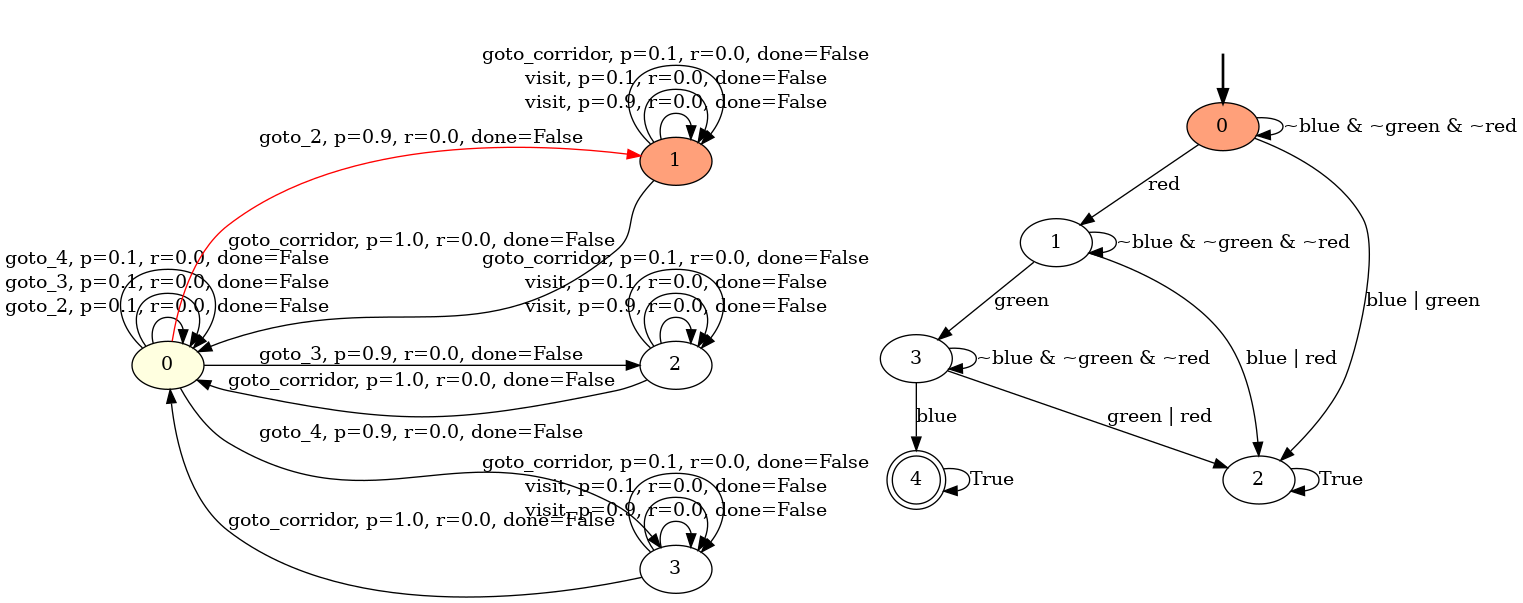

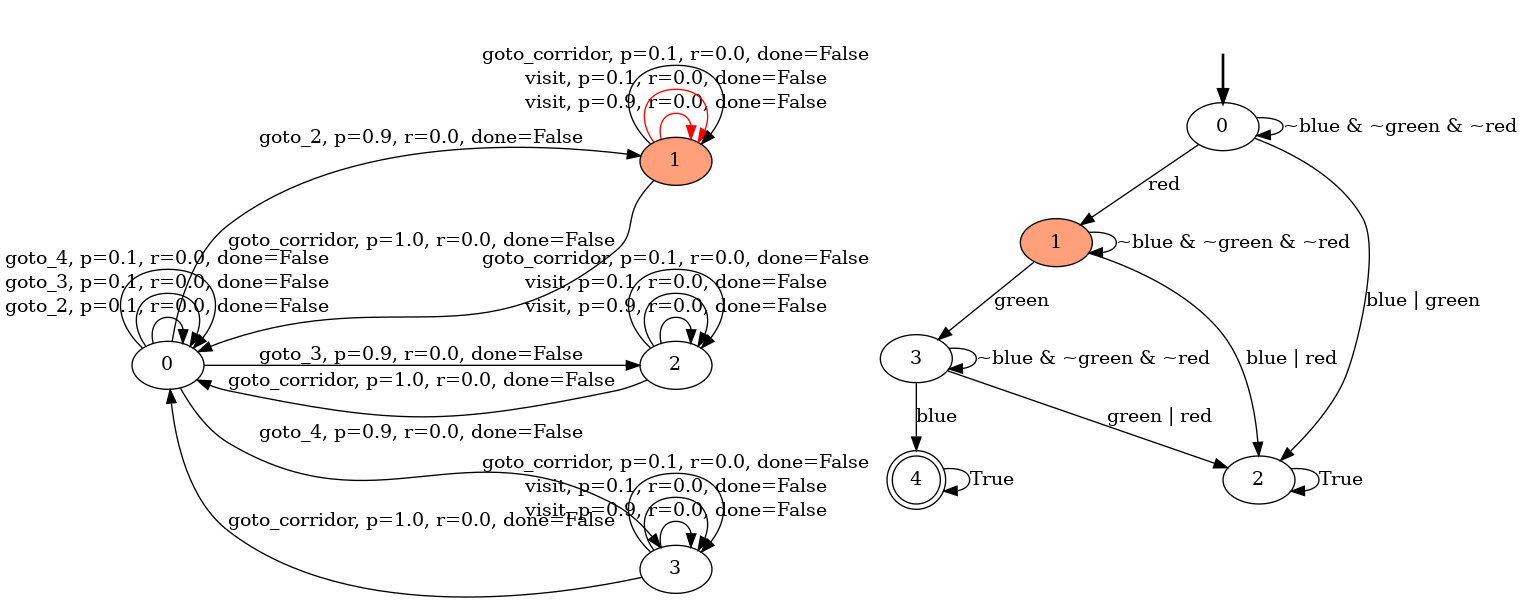

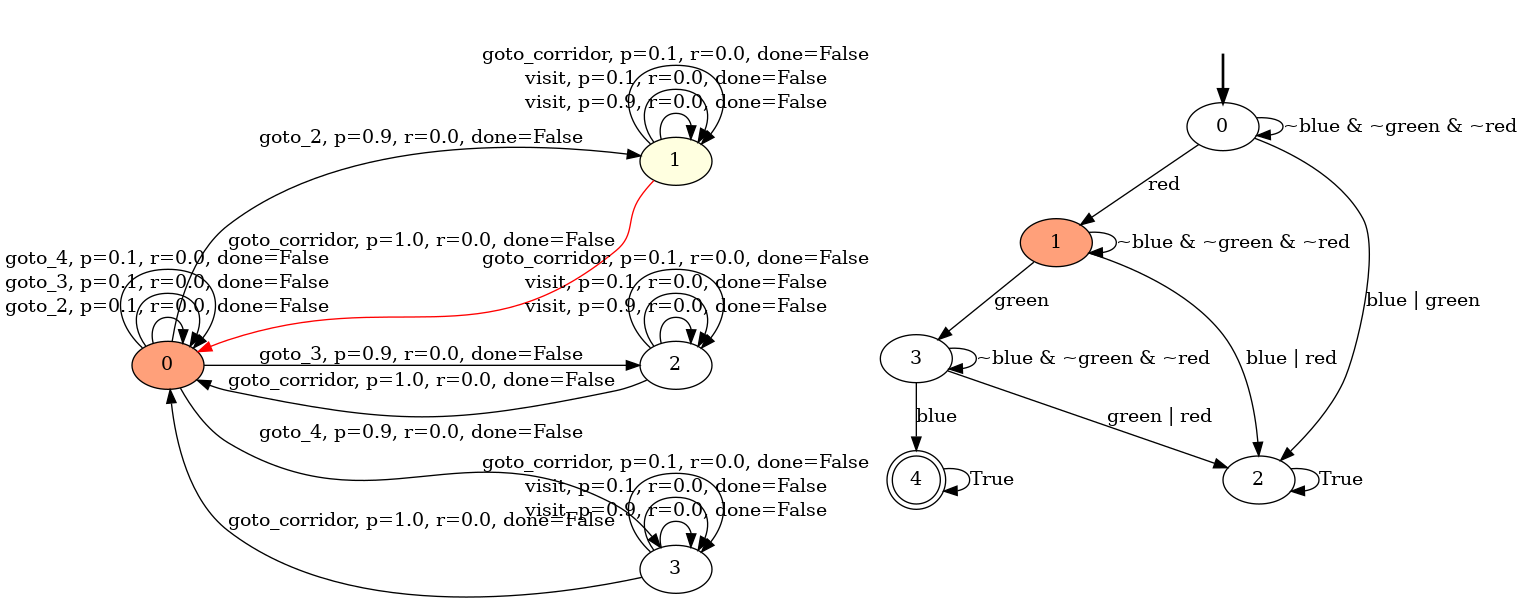

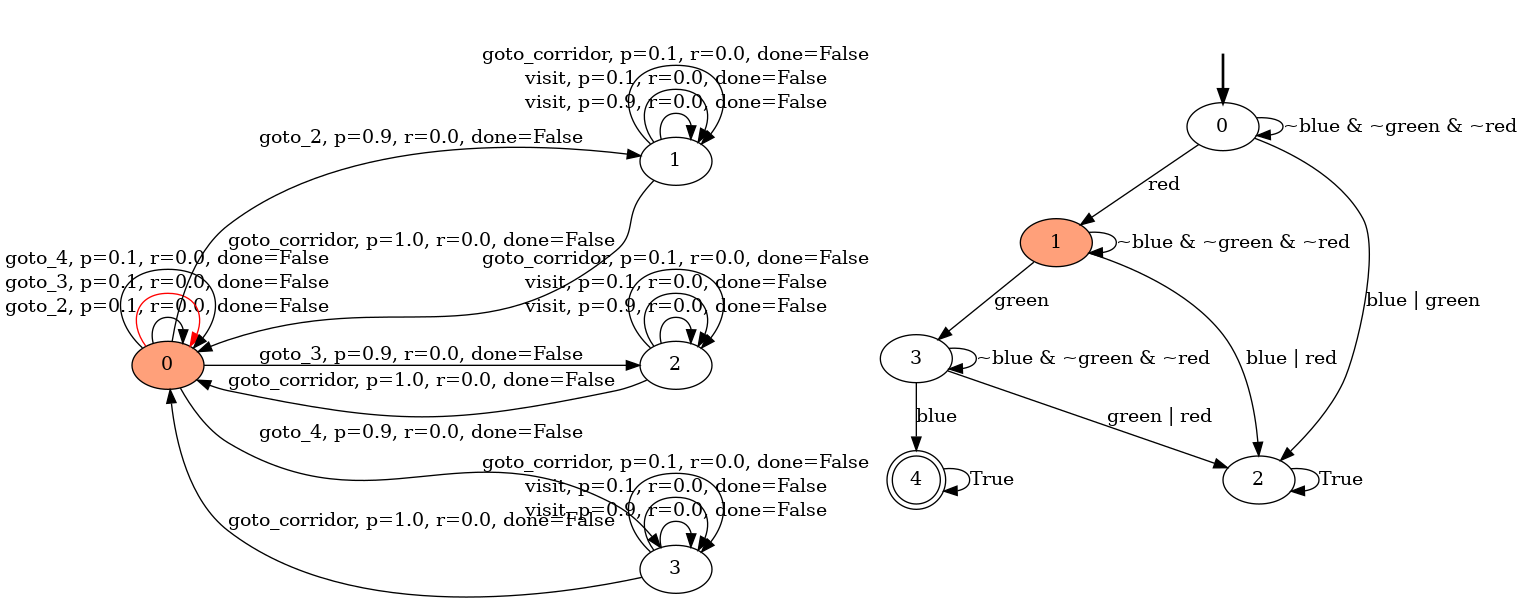

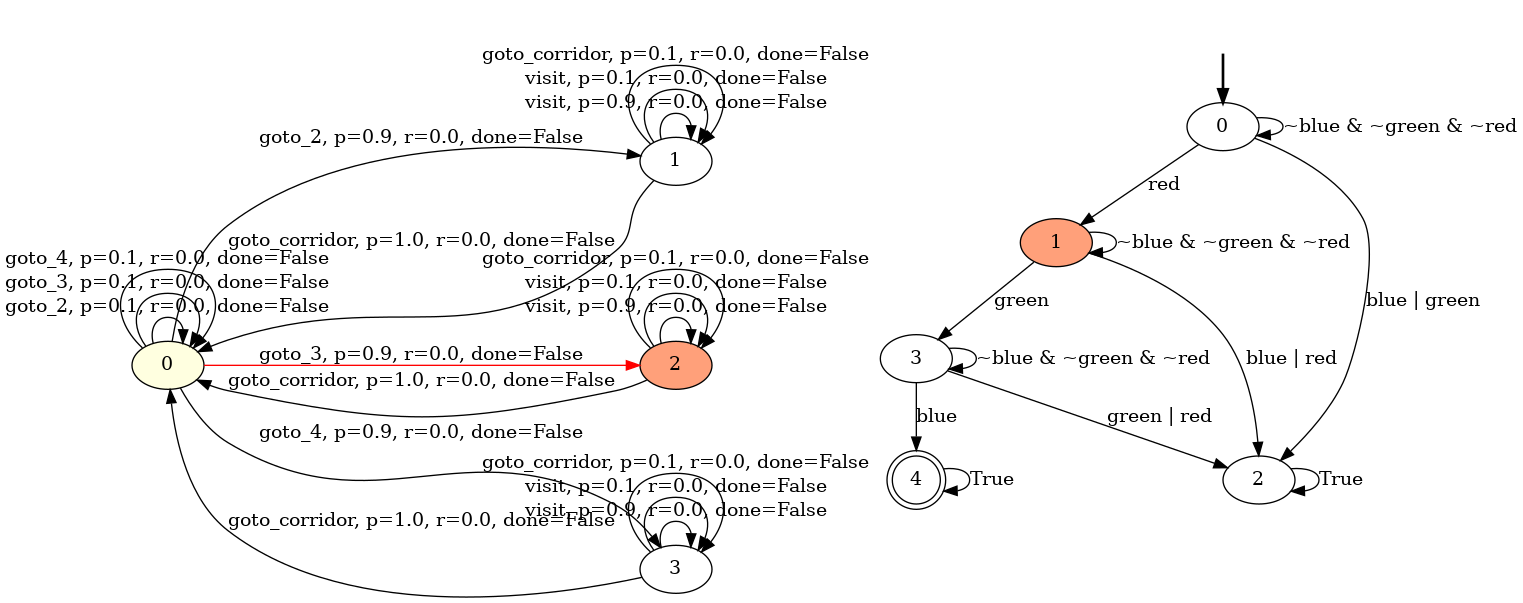

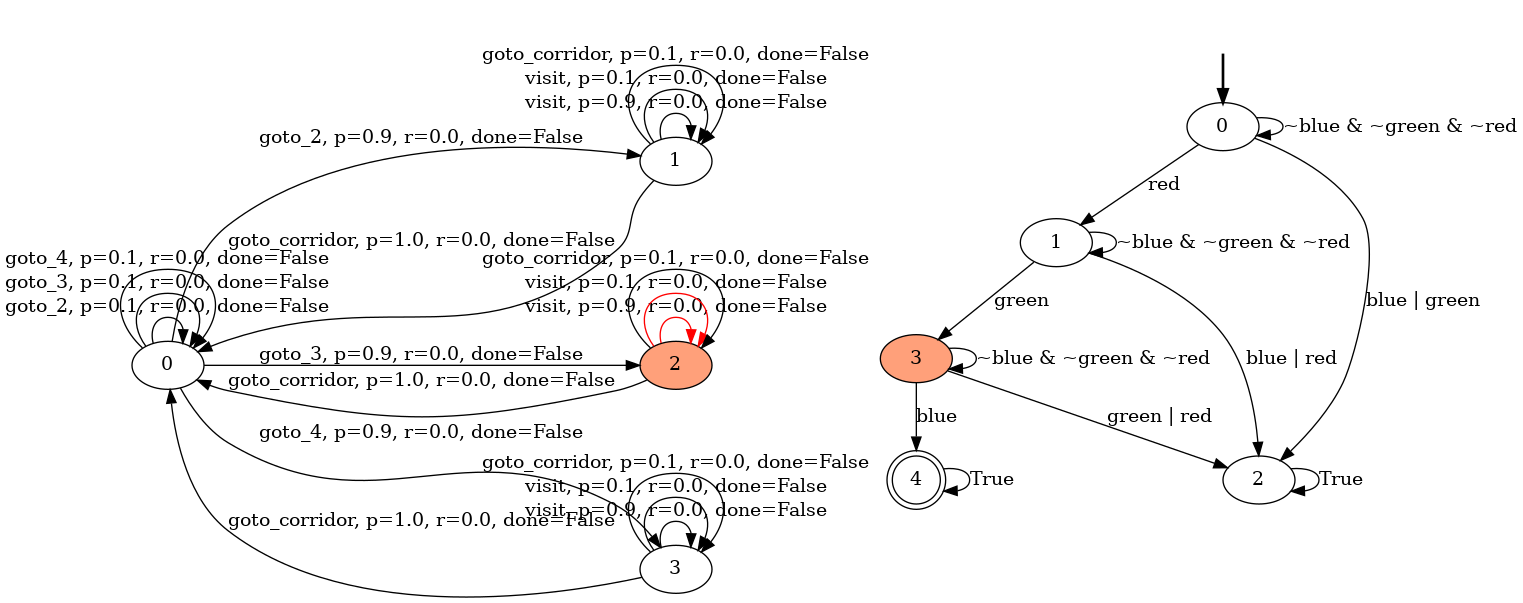

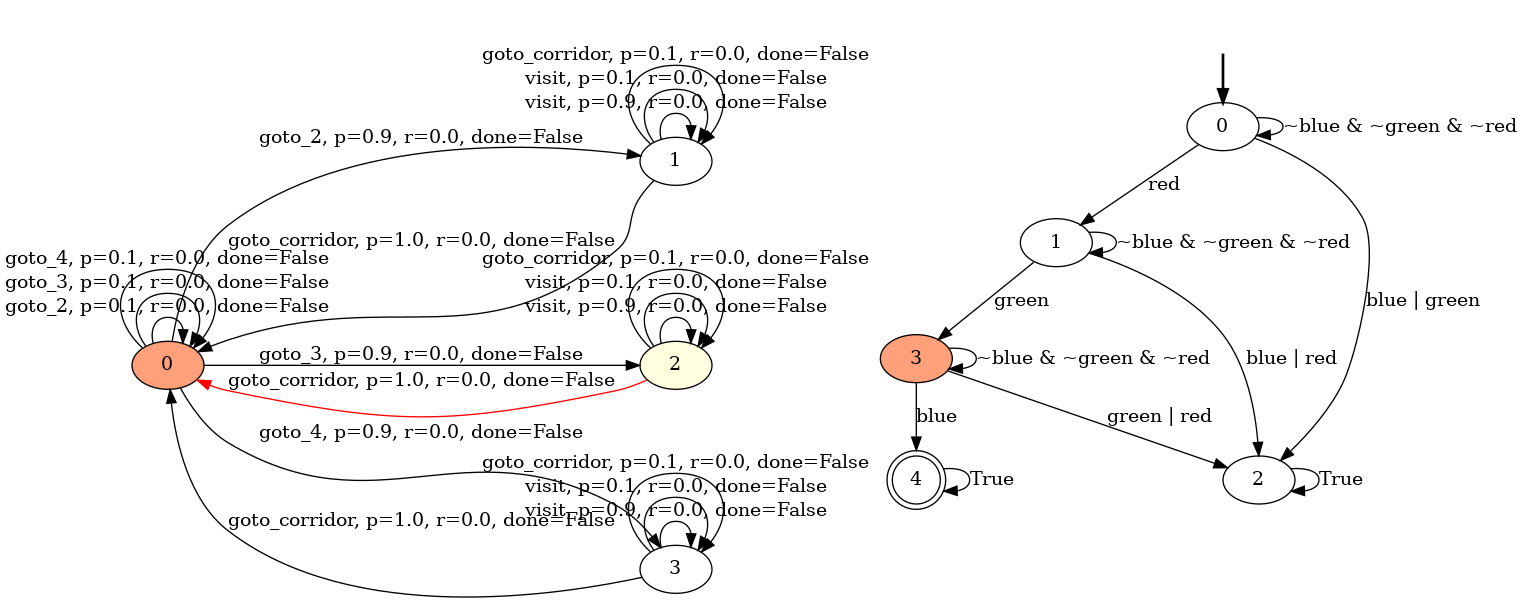

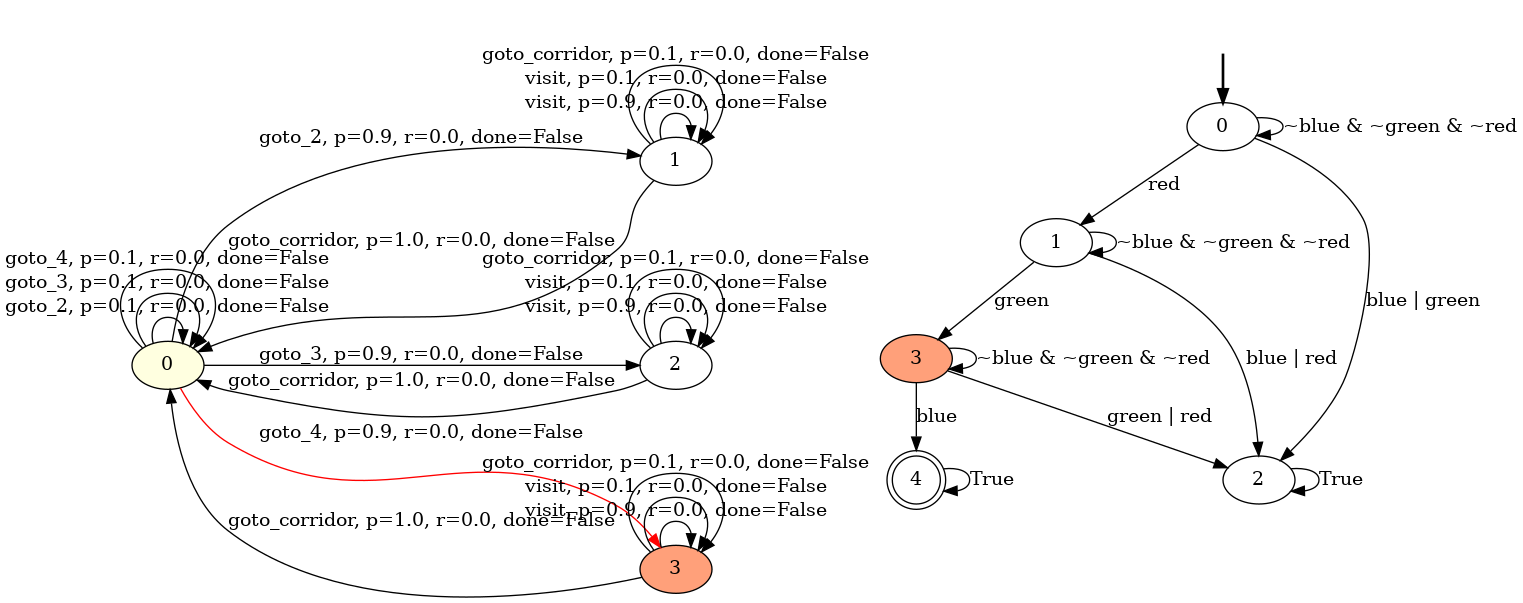

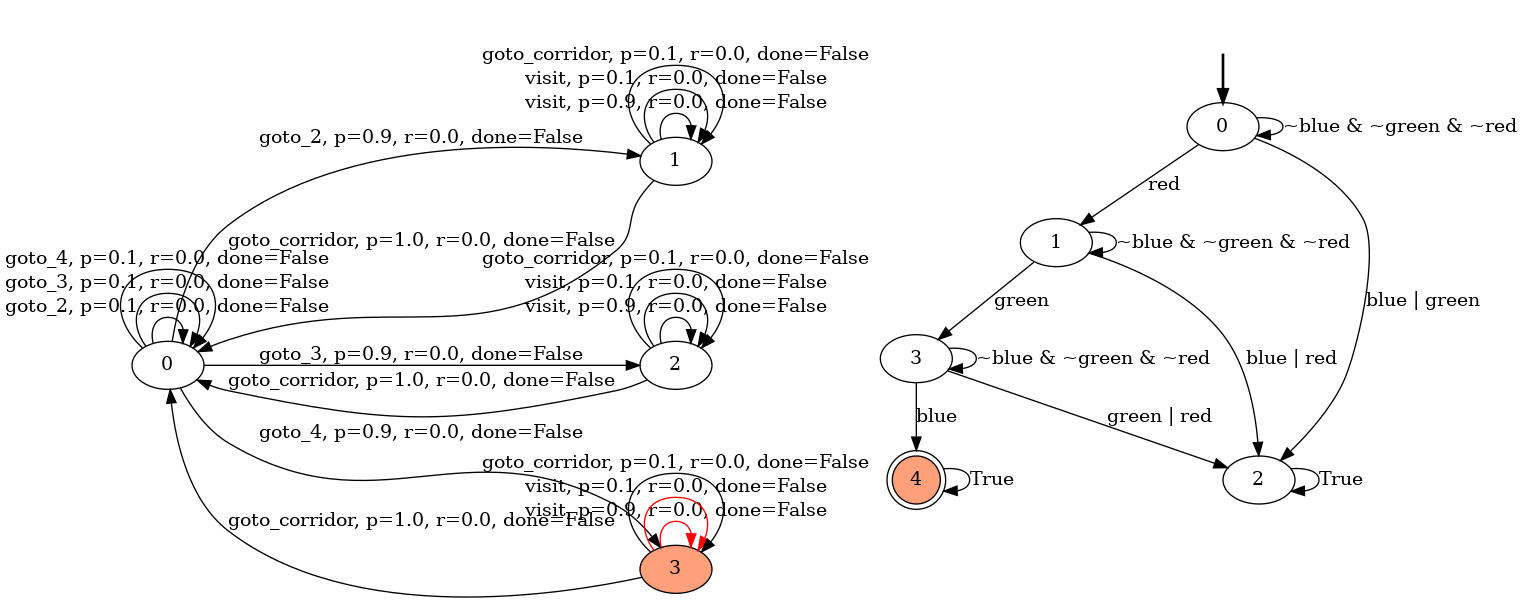

In [6]:
def step_callback(env, step):
    print_env(env)
    state, reward, done, info = step
    print(f"s={state}, r={reward:04.1f}, value={value[state]:05.2f}")

rollout(env, policy=lambda _env, _state: policy[_state], callback=step_callback)